In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dataset=[11,10,12,14,12,15,14,13,15,10,12,10,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,12,10,14,13,15,10];

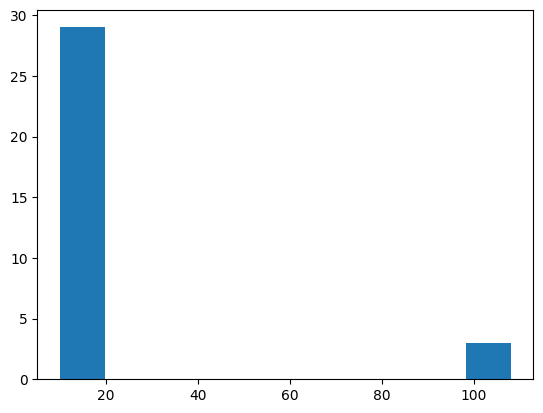

In [13]:
plt.hist(dataset);

In [74]:
# in-efficient way Z-Score 
def detect_Zscore_outliers(data):
    treshold=3
    mean=np.mean(data)
    std=np.std(data)
    outliers=[];

    for i in data:
        z_score=(i-mean)/std #diff from the mean
        # print(str(z_score) + ": " + str(i))

        if np.abs(z_score)>treshold: # np.abs means it will convert any negative float or number to the positive number
            outliers.append(i)
    return outliers

In [75]:
detect_Zscore_outliers(dataset)

[102, 107, 108]

## IQR
1. Sort the Data
2. Calculate Q1(25%) and Q3(73)
3. IQR(Q3-Q1)
4. Find LowerFence(Q1-1.5(IQR)) and HigherFence(Q3+1.5(IQR))

In [93]:
# Efficient way IQR
def detect_IQR_outliers(data):
    sort_data=sorted(data) #sort data
    q1,q3=np.percentile(data,[25,75]) #find q1 and q2 Quadirent
    iqr=q3-q1 # find IQR
    lowerFence=q1-(1.5*iqr) #lower Fence
    higherFence=q3+(1.5*iqr) #Higher Fence

    outliers=[];
    for i in data:
        if (i<lowerFence or i>higherFence):
            outliers.append(i)
            
    return outliers

In [94]:
detect_IQR_outliers(dataset)

[102, 19, 107, 108]

<Axes: >

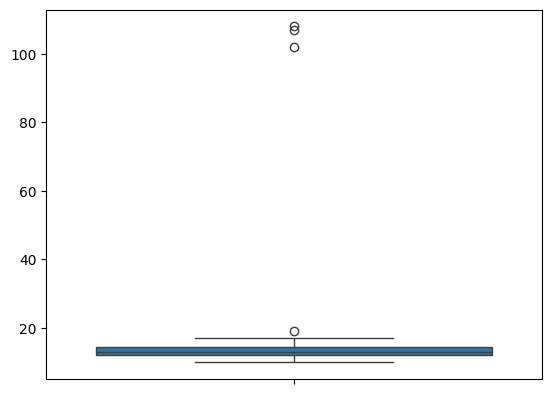

In [96]:
# Simple Way to plot a graph of outliers without outliers
import seaborn
seaborn.boxplot(dataset)